# Linear Regression
Solving the example from `FitLine` using the matrix implementation of the general least squares method.

This first example assumes a constant error in y.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# avoid printing out too many decimals
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})

In [3]:
# This is the same data from FitLine, which is
# very rougly a line with a = 0 and b = 1
# except we are taking sigy to be a constant.
x     = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y     = np.array([1.1, 1.8, 3.3, 4.2, 4.9])
#sigy  = np.array([0.12, 0.15, 0.11, 0.18, 0.09])  # before
sigy = np.array([0.12, 0.12, 0.12, 0.12, 0.12])   # assume same sigy

<ErrorbarContainer object of 3 artists>

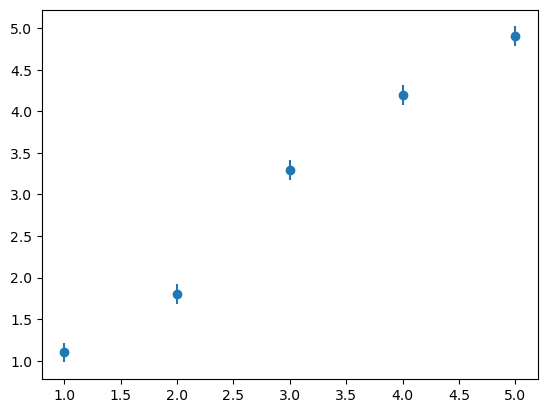

In [4]:
plt.errorbar(x, y, sigy, fmt='o')

First set up the $\mathbf{G}$ matrix (aka design matrix) and $\mathbf{D}$ vector (aka response vector).

In [5]:
# Let's set up the G matrix one row at a time.
# first row of G matrix
G1 = np.ones_like(x)
G1

array([ 1.00000,  1.00000,  1.00000,  1.00000,  1.00000])

In [6]:
# second row of G matrix
G2 = x
G2

array([ 1.00000,  2.00000,  3.00000,  4.00000,  5.00000])

In [7]:
# stack them vertically and take transpose because G is N x M (not M x N)
G = np.vstack([G1, G2]).T
G

array([[ 1.00000,  1.00000],
       [ 1.00000,  2.00000],
       [ 1.00000,  3.00000],
       [ 1.00000,  4.00000],
       [ 1.00000,  5.00000]])

In [8]:
# data vector
D = y
D

array([ 1.10000,  1.80000,  3.30000,  4.20000,  4.90000])

Solve for $$\mathbf{\hat{A}} = (\mathbf{G}^T \mathbf{G)^{-1}} \mathbf{G}^T \mathbf{D} = \mathbf{\psi}^{-1} \mathbf{G}^T \mathbf{D}$$

In [9]:
psi = np.linalg.inv(np.dot(G.T, G))

In [10]:
Ahat = np.dot(psi, np.dot(G.T, D))
Ahat

array([ 0.06000,  1.00000])

Plot data and best-fit model.

In [11]:
def model(x, a, b):
    return a + b*x

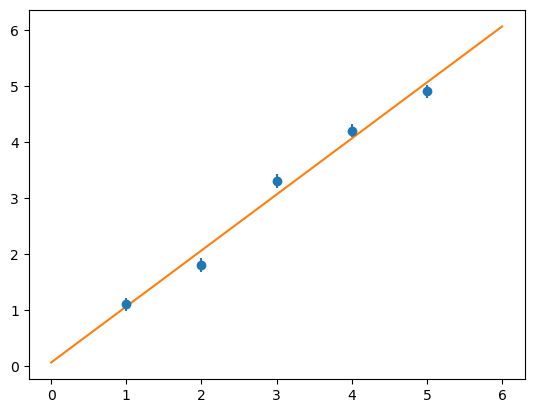

In [12]:
plt.errorbar(x, y, sigy, fmt='o')
xgrid = np.linspace(0, 6, 1000)
plt.plot(xgrid, model(xgrid, *Ahat), c='#ff7f0e')

Now let's generalize this to arbitary errors, but let's still assume that there is no covariance between the datapoints.  So $\sigma = \sigma_i$ is different for all $i$, but $\sigma_{ij} = 0$.

In [13]:
# now allow sigma_y to be different for each data point
x     = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y     = np.array([1.1, 1.8, 3.3, 4.2, 4.9])
sigy  = np.array([0.12, 0.15, 0.11, 0.18, 0.09])

We now just have to set up the data covariance matrix. $$ \mathbf{E} = \begin{pmatrix} \sigma_1^2 & 0 & \ldots & 0 \\ 0 & \sigma_2^2 & \ldots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & ... & \sigma_N^2 \end{pmatrix}$$ $\mathbf{G}$ and $\mathbf{D}$ are still the same.

In [14]:
vars = sigy*sigy
vars

array([ 0.01440,  0.02250,  0.01210,  0.03240,  0.00810])

In [15]:
# data covariance matrix (diagonal of variances; no covariance)
E = np.diag(vars)
E

array([[ 0.01440,  0.00000,  0.00000,  0.00000,  0.00000],
       [ 0.00000,  0.02250,  0.00000,  0.00000,  0.00000],
       [ 0.00000,  0.00000,  0.01210,  0.00000,  0.00000],
       [ 0.00000,  0.00000,  0.00000,  0.03240,  0.00000],
       [ 0.00000,  0.00000,  0.00000,  0.00000,  0.00810]])

In [16]:
# inverse of E
Einv = np.linalg.inv(E)
Einv

array([[ 69.44444,  0.00000,  0.00000,  0.00000,  0.00000],
       [ 0.00000,  44.44444,  0.00000,  0.00000,  0.00000],
       [ 0.00000,  0.00000,  82.64463,  0.00000,  0.00000],
       [ 0.00000,  0.00000,  0.00000,  30.86420,  0.00000],
       [ 0.00000,  0.00000,  0.00000,  0.00000,  123.45679]])

Now, it's just a matter of solving the matrix equation $$\mathbf{\hat{A}} = (\mathbf{G}^T \mathbf{E}^{-1} \mathbf{G)^{-1}} \mathbf{G}^T \mathbf{E}^{-1} \mathbf{D} = \mathbf{\Psi}^{-1} \mathbf{G}^T \mathbf{E}^{-1} \mathbf{D}$$

In [17]:
PSI = np.dot(G.T, np.dot(Einv, G))

In [18]:
Ahat = np.dot(np.linalg.inv(PSI), np.dot(G.T, np.dot(Einv, D)))
Ahat

array([ 0.15899,  0.96591])

This is exactly what we got before in our `FitLine` notebook!

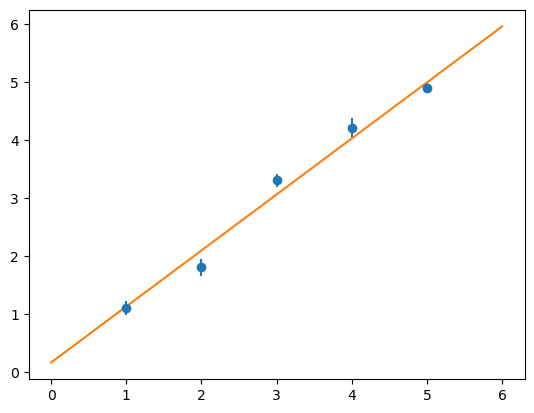

In [19]:
plt.errorbar(x, y, sigy, fmt='o')
xgrid = np.linspace(0, 6, 1000)
plt.plot(xgrid, model(xgrid, *Ahat), c='#ff7f0e')

If you want to construct a more complex model, e.g., $$y = a + bx + cx^2 + dx^3 + ex^4$$ then all you have to do is put together a new design matrix $\mathbf{G}$ and repeat.

In [20]:
G3 = x*x
G4 = x*x*x
G5 = x*x*x*x
G = np.vstack([G1, G2, G3, G4, G5]).T
G

array([[ 1.00000,  1.00000,  1.00000,  1.00000,  1.00000],
       [ 1.00000,  2.00000,  4.00000,  8.00000,  16.00000],
       [ 1.00000,  3.00000,  9.00000,  27.00000,  81.00000],
       [ 1.00000,  4.00000,  16.00000,  64.00000,  256.00000],
       [ 1.00000,  5.00000,  25.00000,  125.00000,  625.00000]])

In [21]:
PSI = np.dot(G.T, np.dot(Einv, G))
Ahat = np.dot(np.linalg.inv(PSI), np.dot(G.T, np.dot(Einv, D)))
Ahat

array([ 4.40000, -6.81667,  4.42500, -0.98333,  0.07500])

In [22]:
def newmodel(x, a, b, c, d, e):
    return a + b*x + c*x*x +d*x*x*x + e*x*x*x*x

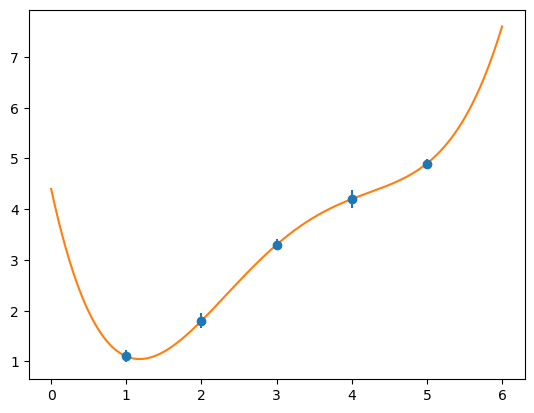

In [23]:
plt.errorbar(x, y, sigy, fmt='o')
xgrid = np.linspace(0, 6, 1000)
plt.plot(xgrid, newmodel(xgrid, *Ahat), c='#ff7f0e')